<a href="https://colab.research.google.com/github/RD191295/Tensorflow_Tutorials/blob/main/01_nerual_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Nerual Networks in Tensorflow


There are Many defination for a regression problem but in our case we are going to simplify it: predicting  a numerical variable based on som other combination of variables , even shorter... predicting number

In [58]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


# Creating data to view and fit

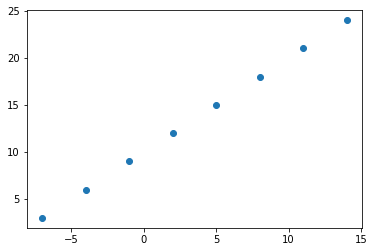

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

## Input and Output shapes

In [60]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price                         

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [61]:
x[0], y[0]

(-7.0, 3.0)

In [62]:
x[1], y[1]

(-4.0, 6.0)

In [63]:
input_shape = x.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [64]:
# Turn our Numpy array into tensors
X = tf.constant(x)
y = tf.constant(y)
x, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## steps in modeling with Tensorflow

1. **creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **compiling a model** - define the loss function( in other words , the function which tells our model how wrong it is) and the optimizer ( tells our model how to improve the patterns its learning) and evaluation metrics ( what we can use to interpret the performance of our model)

3. **Fitting a model**- letting the model try to find patterns between x & y

In [65]:
# set random seed
tf.random.set_seed(42)

# 1. Build model using the sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis = -1),y, epochs = 25)

Epoch 1/25
1/1 [==============================] - 0s 270ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/25
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/25
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/25
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/25
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/25
1/1 [==============================] - 0s 5ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/25
1/1 [==============================] - 0s 6ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/25
1/1 [==============================] - 0s 5ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/25
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/25
1/1 [==============================] - 0s 5ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/25
1/1 [==============================] - 0s 5ms/step - l

In [66]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [67]:
# Try and make prediction using our model
model.predict([17.0])

array([[24.816017]], dtype=float32)

## Improve Model

We can imporve our model , by altering the steps we took to create model.

1. **Creating a Model** - we might add more layers, increase the number of hidden units( all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **compiling model** - here we might change optimization function or perhaps the lerning rate of the optimization function.

3. **Fitting model** - here we might fit a model for more epochs (leave it training for longer) or on more data(give the model more examples to learn from)

In [68]:
# 1. Build model using the sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64 , activation = "relu"),
    tf.keras.layers.Dense(units = 32, activation = "relu"),
    tf.keras.layers.Dense(units = 16, activation = "relu"),
    tf.keras.layers.Dense(1)
])
# 2. compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis = -1),y, epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 459ms/step - loss: 12.5606 - mae: 12.5606
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2003 - mae: 11.2003
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0089 - mae: 10.0089
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4663 - mae: 8.4663
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 6.4502 - mae: 6.4502
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 4.0821 - mae: 4.0821
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 4.3891 - mae: 4.3891
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 5.2313 - mae: 5.2313
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 5.3820 - mae: 5.3820
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 5.0437 - mae: 5.0437
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss:

In [69]:
# Try and make prediction using our model
model.predict([17.0])

array([[28.058153]], dtype=float32)

In [70]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Evaluting a model

In Practice a typical workflow you will go through when building nerual network is :

Build Model --> Fit it --> Evalute It -->tweak a model -> fit it --> evalute it -->tweak a model 

In [71]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [72]:
# Make labels for the dataset
Y = X +10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

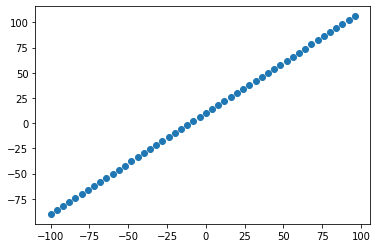

In [73]:
# Visalize Dataset
import matplotlib.pyplot as plt
plt.scatter(X, Y)

### The 3 sets....

* **Training Set** - the model learns from this data , which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data avilable.

* **Test set** - the model gets evaluted on this data to test what is has learned , this set is typically 10-15% of the total data available.

In [74]:
# check the length of how many samples we have
len(X)

50

In [75]:
# split the data into train and test sets
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

## Visalizing data
Now we have got our data in training and test sets...let's visualize it again!!


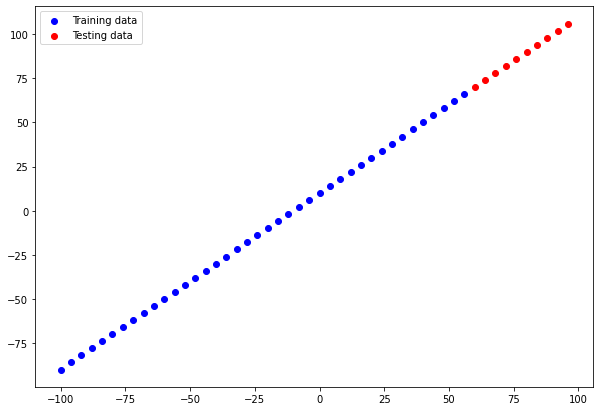

In [76]:
plt.figure(figsize = (10,7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label = "Training data")
# Plot training data in red
plt.scatter(X_test, Y_test, c="r", label = "Testing data")
plt.legend()
plt.show()

In [77]:
# Let's have a look at building nerual network for our data

# 1. Build model using the sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = (1,),name = "input_layer"),
    tf.keras.layers.Dense(16,name = "hidden_layer"),

    tf.keras.layers.Dense(1,name = "output_layer")
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae","mse"])

## Model Summary

In [78]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 16)                32        
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


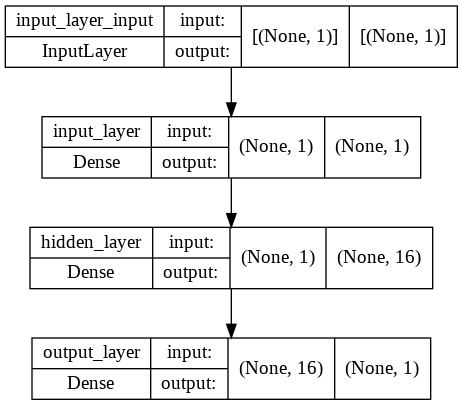

In [79]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

In [80]:
# Train model
# 3. Fit the model
model.fit(X_train,Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 18.9042 - mae: 18.9042 - mse: 528.3729
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7212 - mae: 9.7212 - mse: 103.6820
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3743 - mae: 10.3743 - mse: 150.3655
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 11.5368 - mae: 11.5368 - mse: 179.2285
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5284 - mae: 8.5284 - mse: 100.3317
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 8.4074 - mae: 8.4074 - mse: 76.5935
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4327 - mae: 9.4327 - mse: 89.0261
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6927 - mae: 8.6927 - mse: 76.9322
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 7.3843 - mae: 7.3843 - mse: 76.1913
Epoch 10/100
2/2 [========

### Visualizing our model's predictions

In [81]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 70.94775],
       [ 75.00783],
       [ 79.06791],
       [ 83.128  ],
       [ 87.18807],
       [ 91.24815],
       [ 95.30824],
       [ 99.36831],
       [103.42838],
       [107.48848]], dtype=float32)

In [82]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

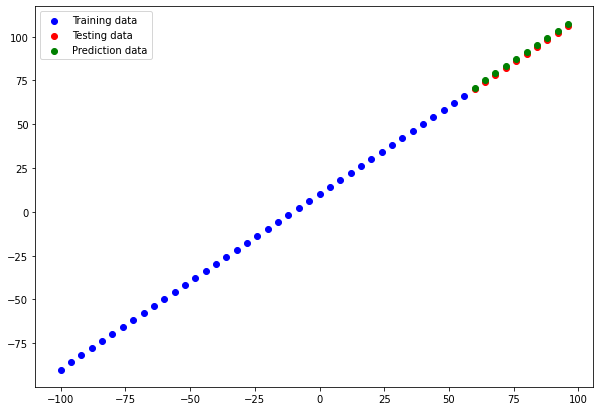

In [83]:
# Let's create a plotting function

def plot_prediction(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = y_pred):
  """
  Plots training data ,testing data and prediction data to compare it with grounftruth labels
  """
  plt.figure(figsize = (10, 7))
  # Plot training data in blue
  plt.scatter(X_train, Y_train, c="b", label = "Training data")
  # Plot testing data in red
  plt.scatter(X_test, Y_test, c="r", label = "Testing data")
  # Plot testing data in red
  plt.scatter(X_test, y_pred, c="g", label = "Prediction data")
  plt.legend()
  plt.show()

plot_prediction()

### EValuting our model's prediction with regression evalution metrics

In [84]:
# Evaluate the model on the test
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 126ms/step - loss: 1.2181 - mae: 1.2181 - mse: 1.5136


[1.2181129455566406, 1.2181129455566406, 1.5135784149169922]

In [85]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(Y_test, tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=1.2181122>

In [86]:
# Calculate the mean square error
tf.metrics.mean_squared_error(Y_test, tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=1.5135772>

In [87]:
# Callculate the metrics 
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(tf.constant(y_pred)))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(tf.constant(y_pred)))

### Running experiments to improve our model

```
Build a model -> fit it -> evalute it -> tweak it -> tweak it -> fit it -> evalute it -> tweak it -> fit it -> evaluate it ...
```
1. Get more data - get more examples for your model to train on ( more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger( using a more complex model)- this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layerm trained for 100 epochs.
2. `model_2`  - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs.

**Build Model -1**

In [88]:
# set random seed
tf.random.set_seed(42)

#1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

#3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

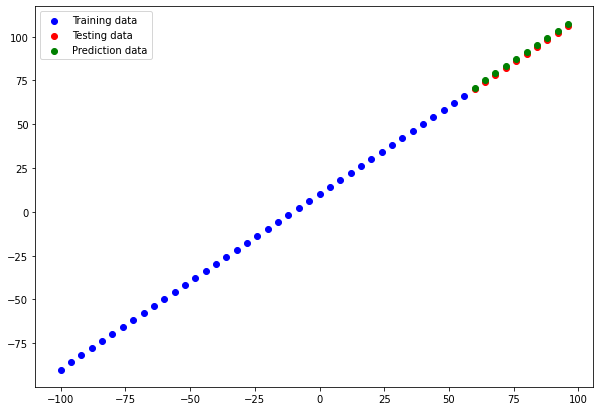

In [89]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_prediction(predictions = y_preds_1)

In [90]:
# Calculate model_1 evalution metrics
mae_1 = mae(Y_test, tf.squeeze(y_preds_1))
mse_1 = mse(Y_test, tf.squeeze(y_preds_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build Model 2**

In [91]:
# set random seed
tf.random.set_seed(42)

#1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["mse"])

#3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 43.3544 - mse: 2662.2827
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 35.5962 - mse: 1814.1895
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 28.1192 - mse: 1144.8695
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 20.4840 - mse: 628.8112
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 12.9946 - mse: 280.3784
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 6.9888 - mse: 80.2960
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 5.9711 - mse: 57.3622
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1001 - mse: 126.0530
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 10.6464 - mse: 142.6120
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5446 - mse: 101.2881
Epoch 11/100
2/2 [==============================] -

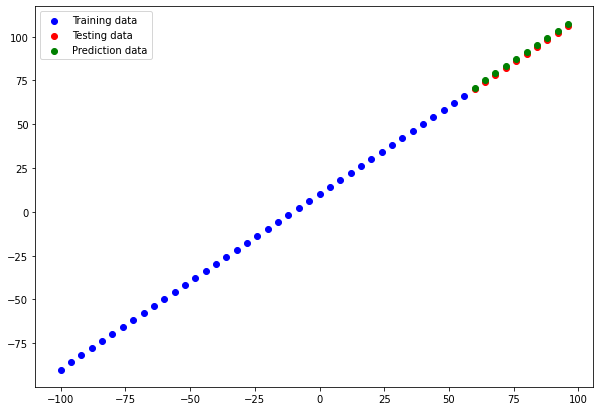

In [92]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_prediction(predictions = y_preds_2)

In [93]:
# Calculate model_1 evalution metrics
mae_2 = mae(Y_test, tf.squeeze(y_preds_2))
mse_2 = mse(Y_test, tf.squeeze(y_preds_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.115851>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.892798>)

**Model-3**

In [94]:
# set random seed
tf.random.set_seed(42)

#1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["mse"])

#3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 482)

Epoch 1/482
2/2 [==============================] - 0s 7ms/step - loss: 43.3544 - mse: 2662.2827
Epoch 2/482
2/2 [==============================] - 0s 8ms/step - loss: 35.5962 - mse: 1814.1895
Epoch 3/482
2/2 [==============================] - 0s 5ms/step - loss: 28.1192 - mse: 1144.8695
Epoch 4/482
2/2 [==============================] - 0s 3ms/step - loss: 20.4840 - mse: 628.8112
Epoch 5/482
2/2 [==============================] - 0s 12ms/step - loss: 12.9946 - mse: 280.3784
Epoch 6/482
2/2 [==============================] - 0s 4ms/step - loss: 6.9888 - mse: 80.2960
Epoch 7/482
2/2 [==============================] - 0s 8ms/step - loss: 5.9711 - mse: 57.3622
Epoch 8/482
2/2 [==============================] - 0s 6ms/step - loss: 10.1001 - mse: 126.0530
Epoch 9/482
2/2 [==============================] - 0s 8ms/step - loss: 10.6464 - mse: 142.6120
Epoch 10/482
2/2 [==============================] - 0s 5ms/step - loss: 8.5446 - mse: 101.2881
Epoch 11/482
2/2 [==============================] 

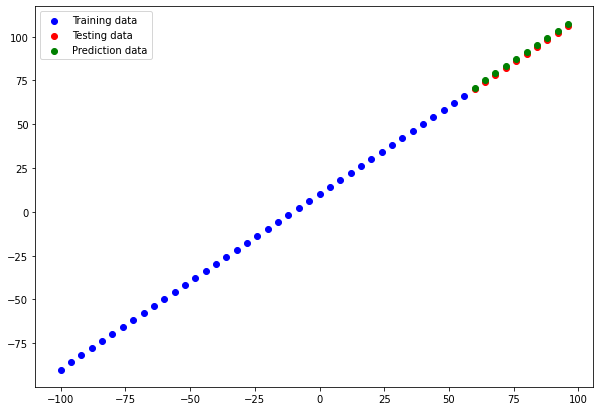

In [95]:
# Make and plot predictions for model_2
y_preds_3 = model_3.predict(X_test)
plot_prediction(predictions = y_preds_3)

In [96]:
# Calculate model_3 evalution metrics
mae_3 = mae(Y_test, tf.squeeze(y_preds_3))
mse_3 = mse(Y_test, tf.squeeze(y_preds_3))

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.17884827>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.033571117>)

### Comparing the results of our experiments

In [97]:
# Let's compare our mode's results using a pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1.numpy() , mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]
                 ]

all_results = pd.DataFrame(model_results, columns=["model Name","mae","mse"])
all_results

,model Name,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.115851,9.892798
2,model_3,0.178848,0.033571


### 🔑 Model-3 look like best performing model among all three

## Tracking your experiments

one really good habit in machine learning modelling is to track the results of your experiments.

Below tool will help :

* TensorBoard 
* weights & Biases (https://wandb.ai/site)



### Save Model weights
Saving our models allows us to use them outside of google colab ( or whereever they were trained) such as in web application or mobile application

Models can save in two formate:
1. The SavedModel format
2. THe HDF5 format

In [98]:
# save model using the savedmodel format
model_3.save("best_model_savedmodel_format")

In [99]:
#  save model using HDF5 format
model_3.save("best_model_HDF5.h5")

### Load Saved Model

In [100]:
# load first saved model format
loades_savedMOdel = tf.keras.models.load_model("/content/best_model_savedmodel_format")

In [101]:
# check summary
loades_savedMOdel.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 64)                128       
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [102]:
# load HDF5 Model format
loaded_HDF5_Model = tf.keras.models.load_model("/content/best_model_HDF5.h5")

In [103]:
# check summary
loaded_HDF5_Model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 64)                128       
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
